In [14]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from enum import Enum

In [15]:
DATA_ROOT = Path("../../data/private")
# VIDEO_NAME = Path("VID_20230814_102451798.mp4")
VIDEO_NAME = Path("static.mp4")

# check if the video exists
if not (DATA_ROOT / VIDEO_NAME).exists():
    raise FileNotFoundError(f"Video not found: {DATA_ROOT / VIDEO_NAME}")

# open video file with opencv
video_reader = cv2.VideoCapture(str(DATA_ROOT/VIDEO_NAME))

# check if video opened successfully
if (video_reader.isOpened() == False):
    raise Exception(f"Error opening video stream or file: {DATA_ROOT/VIDEO_NAME}")
    
width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
# print video properties
print("Video properties:")
print("  - frame width:  ", width)
print("  - frame height: ", height)
print("  - frame count:  ", frames_count)
print("  - frame rate:   ", video_reader.get(cv2.CAP_PROP_FPS))

Video properties:
  - frame width:   1080
  - frame height:  1920
  - frame count:   121
  - frame rate:    29.97002997002997


In [16]:
MIN_MATCH_COUNT = 10

cx = height 
cy = width
focal_length = width
# Approximate camera matrix
K = np.array([[focal_length, 0, cx],
              [0, focal_length, cy],
              [0, 0, 1]])

# Approximated camera projection matrices
P1 = K @ np.hstack((np.identity(3), np.zeros((3, 1))))
P2 = K @ np.hstack((np.identity(3), np.zeros((3, 1))))

  0%|          | 0/5 [00:00<?, ?it/s]

Essential matrix:
[[-5.78910145e-04  1.91511396e-01  1.48773793e-01]
 [-2.19474597e-01 -1.19065663e-02 -6.55130028e-01]
 [-1.74745325e-01  6.58132617e-01  2.95293418e-03]]
Rotation:
[[ 0.99832133  0.03738357 -0.04423791]
 [-0.03766491  0.99927505 -0.00554309]
 [ 0.04399862  0.0072      0.99900565]]
Translation:
[[ 0.93935021]
 [ 0.21210272]
 [-0.26950625]]
[[ -95.79649409  -82.03397076  -82.28122418 ...   -5.81570965
  -643.16161136   -7.44300152]
 [  46.94625679   55.05210712   54.5458205  ...  -11.26095496
  -179.23065336  -12.0592467 ]
 [   4.97511807    6.16782       6.16782    ...   50.11910443
    27.20281723   50.44549792]]


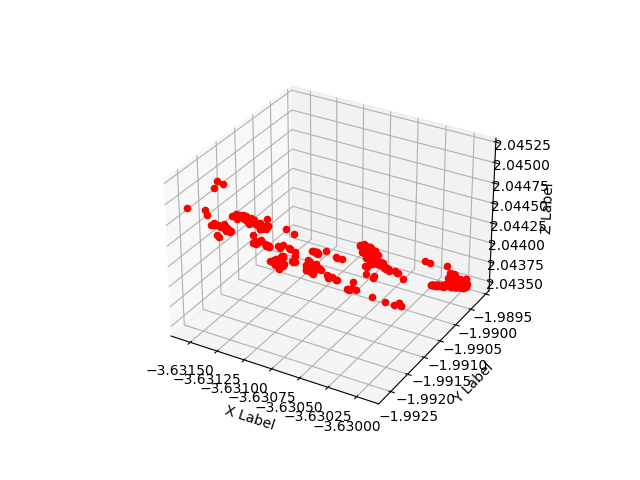

 20%|██        | 1/5 [00:06<00:27,  6.96s/it]

Essential matrix:
[[ 1.48176612e-03 -1.98031189e-01 -1.46019666e-01]
 [ 2.25018412e-01  1.58159656e-02  6.53573503e-01]
 [ 1.74756541e-01 -6.56413013e-01  2.52402848e-04]]
Rotation:
[[ 0.99822588  0.03999345 -0.04410921]
 [-0.04048209  0.99912779 -0.01024056]
 [ 0.04366118  0.01200802  0.99897423]]
Translation:
[[ 0.93750702]
 [ 0.20956262]
 [-0.27778425]]
[[  73.85418224  -93.49015345   30.85839919 ...   26.31010296
  -566.57129054    5.4525045 ]
 [  97.77348707   45.8196274   399.54188129 ...   -5.26920481
  -131.14876612  -13.29618671]
 [  17.24595424    8.09055017   17.9324641  ...   53.0919176
    37.49125254   53.76158788]]


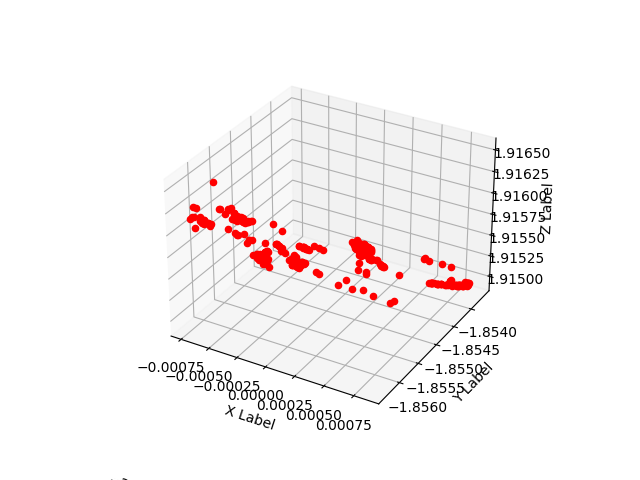

 40%|████      | 2/5 [00:12<00:17,  5.85s/it]

Essential matrix:
[[ 0.00315594 -0.19916941 -0.12464283]
 [ 0.22610239  0.01592392  0.65771914]
 [ 0.15524665 -0.66084292  0.00073559]]
Rotation:
[[ 0.9981469   0.0428526  -0.0432021 ]
 [-0.04329277  0.9990191  -0.00930443]
 [ 0.042761    0.01115753  0.99902303]]
Translation:
[[ 0.94317098]
 [ 0.17905123]
 [-0.2799449 ]]
[[ 561.91735437  617.61980939  -80.10146531 ...   23.512769
    16.78998148   16.78998148]
 [-300.7032334   331.6717733    49.60478572 ...  -16.09605734
   -27.41653111  -27.41653111]
 [  34.86177935   40.14572726    8.06177207 ...   52.84626466
    53.52891799   53.52891799]]


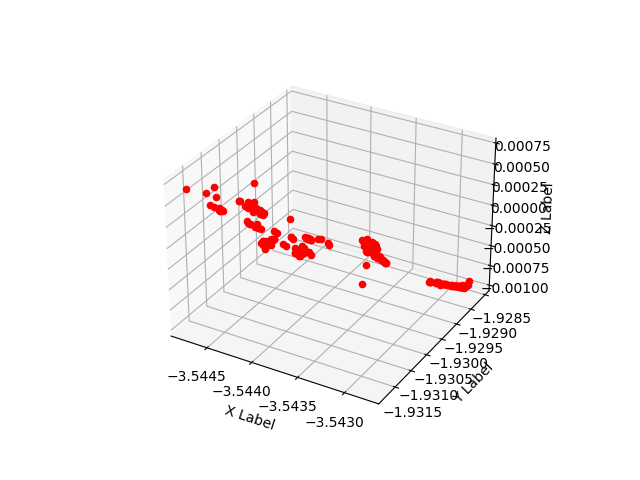

 60%|██████    | 3/5 [00:16<00:10,  5.23s/it]

Essential matrix:
[[-0.00359434  0.18958959  0.13752251]
 [-0.21308413 -0.02152118 -0.65901837]
 [-0.17308988  0.65951959 -0.00556847]]
Rotation:
[[ 0.99803298  0.04809237 -0.04021557]
 [-0.04880121  0.99866665 -0.0168337 ]
 [ 0.03935238  0.01876316  0.99904922]]
Translation:
[[ 0.94353635]
 [ 0.19913204]
 [-0.26473681]]
[[-3.64927594e+01 -7.29605583e+01 -7.61094321e+01 -6.74795701e+01
  -6.90454411e+01  9.43975545e+01 -6.86011448e+01 -1.61417216e+01
   4.13627841e+02  4.13627841e+02 -6.82317725e+01 -1.17271830e+01
  -1.17271830e+01 -6.52096820e+01 -6.71948459e+01  6.35437299e+02
   4.77365266e+01  4.01106965e+01  4.17473863e+01  4.04016385e+01
   3.02703031e+01  4.43813801e+01  5.80979228e+01  5.22559337e+01
   1.06873482e+01 -7.44337929e+01  4.99341421e+01  6.00679766e+01
   5.67863669e+01  6.02047779e+01  5.30829496e+01  6.16078877e+01
   2.76042256e+01  5.42558061e+02  4.98989090e+01  3.02486801e+01
   5.66931558e+01  5.66931558e+01 -3.15824877e+01  5.20600635e+01
   5.53110261e+01

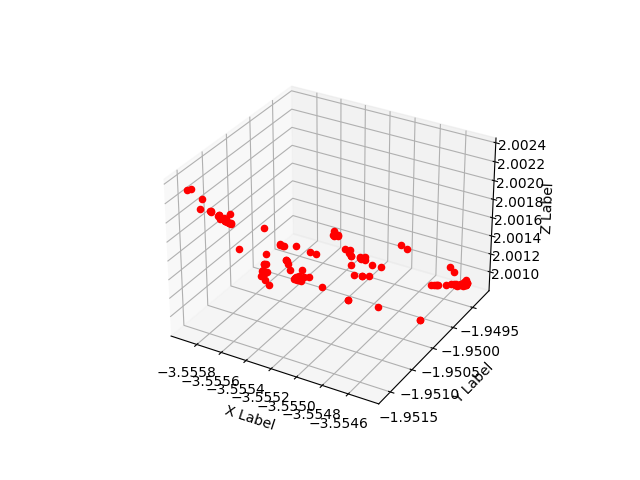

 80%|████████  | 4/5 [00:20<00:04,  4.72s/it]

Essential matrix:
[[ 0.00452262 -0.19040498 -0.12638725]
 [ 0.21178685  0.02151455  0.66171583]
 [ 0.16197654 -0.66203307  0.00657124]]
Rotation:
[[ 0.99817855  0.04798275 -0.03656834]
 [-0.04862596  0.99867395 -0.01690707]
 [ 0.0357086   0.01865445  0.99918812]]
Translation:
[[ 0.94631047]
 [ 0.1833882 ]
 [-0.2662053 ]]
[[ 2.06512811e+02  4.78225201e+01 -4.66440527e+01 -5.04010121e+01
  -4.48915350e+01 -2.35033565e+01 -4.77401828e+01 -5.00917369e+01
  -4.42397031e+01 -4.51791687e+01 -4.25968702e+01 -3.61061236e+01
   2.12341970e+00  1.15099606e+01  2.41327738e+02  1.64970862e+01
   6.21984003e+01  5.89820433e+01  2.46859352e+02  7.77120572e+01
   6.78168981e+01  7.06341448e+01  4.01224420e+01  6.83227761e+01
   6.83227761e+01  8.11201863e+01  6.74023743e+01  8.62854711e+01
  -8.53601592e+00  7.33139457e+01  6.02360154e+01  8.62120488e+01
   9.02367125e+01  9.16485856e+01  9.15928930e+01  5.79738239e+01
   8.03963509e+01 -5.53347840e+00  8.45985194e+01  1.64021633e+00
   8.57080526e+01

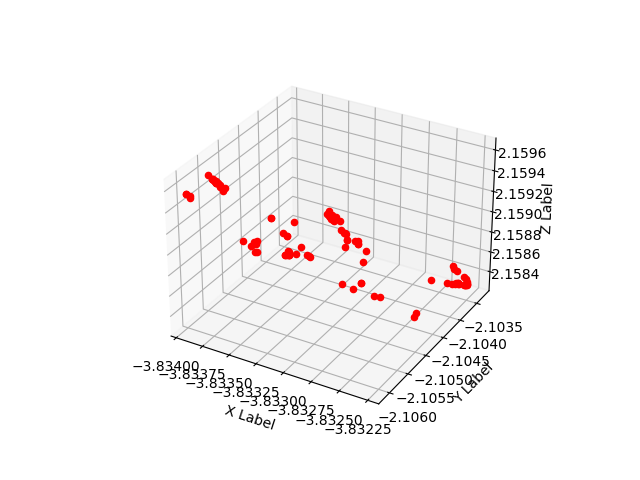

100%|██████████| 5/5 [00:23<00:00,  4.74s/it]


In [19]:
video_reader.set(cv2.CAP_PROP_POS_FRAMES, 0)
_, img1 = video_reader.read()
video_reader.set(cv2.CAP_PROP_POS_FRAMES, 70)
scene_3d = []
for frame_index in tqdm(range(5)): # tqdm(range(frames_count - 2)):
    _, img2 = video_reader.read()
    video_reader.read()
    video_reader.read()
    video_reader.read()
    video_reader.read()
    video_reader.read()
    video_reader.read()
       
    ###############################
    #1----SIFT feature matching---#
    ###############################

    #detect sift features for both images
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    #use flann to perform feature matching
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    if len(good)>MIN_MATCH_COUNT:
        p1 = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        p2 = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       flags = 2)

    img_siftmatch = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    cv2.imwrite('sift_match_' + str(frame_index) + '.png',img_siftmatch)

    #########################
    #2----essential matrix--#
    #########################
    E, mask = cv2.findEssentialMat(p1, p2, K, cv2.RANSAC, 0.999, 1.0);

    matchesMask = mask.ravel().tolist()

    draw_params = dict(#matchColor = (0,255,0), # draw matches in green color
                       #singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)

    img_inliermatch = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    cv2.imwrite('inlier_match_' + str(frame_index) + '.png',img_inliermatch)
    print("Essential matrix:")
    #print(E)

    ####################
    #3----recoverpose--#
    ####################

    points, R, t, mask = cv2.recoverPose(E, p1, p2)
    print("Rotation:")
    #print(R)
    print("Translation:")
    #print(t)
    # p1_tmp = np.expand_dims(np.squeeze(p1), 0)
    p1_tmp = np.ones([3, p1.shape[0]])
    p1_tmp[:2,:] = np.squeeze(p1).T
    p2_tmp = np.ones([3, p2.shape[0]])
    p2_tmp[:2,:] = np.squeeze(p2).T
    #print((np.dot(R, p2_tmp) + t) - p1_tmp)

    #######################
    #4----triangulation---#
    #######################

    #calculate projection matrix for both camera
    M_r = np.hstack((R, t))
    M_l = np.hstack((np.eye(3, 3), np.zeros((3, 1))))

    P_l = np.dot(K,  M_l)
    P_r = np.dot(K,  M_r)

    # undistort points
    p1 = p1[np.asarray(matchesMask)==1,:,:]
    p2 = p2[np.asarray(matchesMask)==1,:,:]
    p1_un = cv2.undistortPoints(p1,K,None)
    p2_un = cv2.undistortPoints(p2,K,None)
    p1_un = np.squeeze(p1_un)
    p2_un = np.squeeze(p2_un)

    #triangulate points this requires points in normalized coordinate
    point_4d_hom = cv2.triangulatePoints(P_l, P_r, p1_un.T, p2_un.T)
    point_3d = point_4d_hom / np.tile(point_4d_hom[-1, :], (4, 1))
    point_3d = point_3d[:3, :].T

    #store 3d points
    scene_3d.append(point_3d)

    #############################
    #5----output 3D pointcloud--#
    #############################
    #TODO: Display 3D points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    for x, y, z in point_3d:
        ax.scatter(x, y, z, c="r", marker="o")

    plt.show()
    fig.savefig('3-D_' + str(frame_index) + '.jpg')

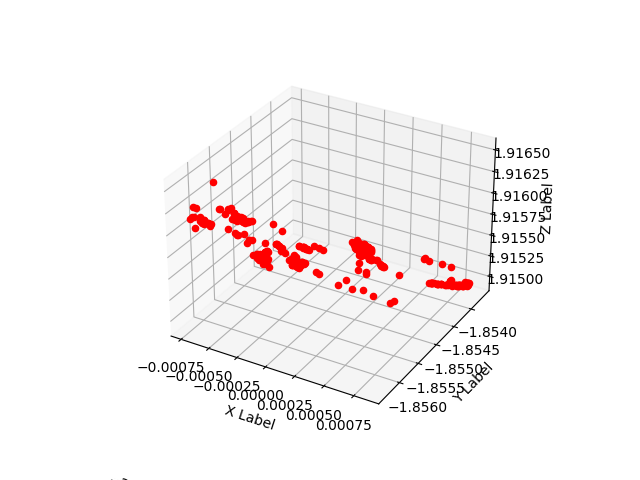

In [18]:
# creating 3d plot using matplotlib
# in python
 
# for creating a responsive plot
%matplotlib widget

# creating random dataset
frame_points = scene_3d[1]
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
for x, y, z in frame_points:
    ax.scatter(x, y, z, c="r", marker="o")
plt.show()